In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression #Lasso回归、岭回归
from sklearn.model_selection import train_test_split #自动进行切割
from sklearn.model_selection import GridSearchCV #表格搜索

data = pd.read_csv("Advertising.csv")
data["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [8]:
x = data[["TV", "radio", "newspaper"]]
y = data["sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
# ridge = Ridge() #创建岭回归模型
lasso = Lasso() #Lasso回归
alpha_scan = np.logspace(-3,2,10) #指数类型数组,-3表示处理3列，2表示有2个系数，10表示有10个这样的数据
lasso_model = GridSearchCV(lasso, param_grid={"alpha":alpha_scan}, cv=5) #自动匹配最佳alpha
lasso_model.fit(x_train, y_train) #训练数据
lasso_model.best_params_ #寻找最佳alpha

e:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


{'alpha': 0.5994842503189409}

In [9]:
lasso_model.score(x_train, y_train)

0.8958770078340469

In [10]:
lasso_model.score(x_test, y_test)

0.8911031161434835

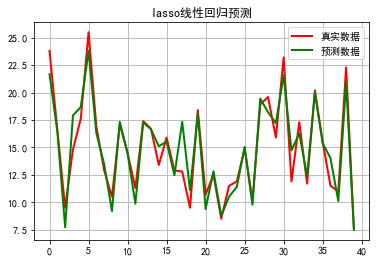

In [11]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False #解决中文乱码
order = y_test.argsort(axis=0) #按照参数排序
y_hat = lasso_model.predict(x_test) #预测的数据
plt.figure(facecolor="w")
t = np.arange(len(x_test)) #生成数组
plt.plot(t, y_test, "r-", linewidth=2, label="真实数据")
plt.plot(t, y_hat, "g-", linewidth=2, label="预测数据")
plt.legend()
plt.title("lasso线性回归预测")
plt.grid()
plt.show()

e:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.8959372499163616
0.8927142790413891


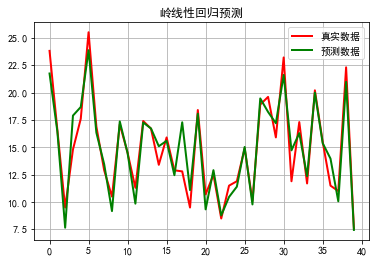

In [13]:
x = data[["TV", "radio", "newspaper"]]
y = data["sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
ridge = Ridge() #岭回归
alpha_scan = np.logspace(-3,2,10) #指数类型数组,-3表示处理3列，2表示有2个系数，10表示有10个这样的数据
ridge_model = GridSearchCV(ridge, param_grid={"alpha":alpha_scan}, cv=5) #自动匹配最佳alpha
ridge_model.fit(x_train, y_train) #训练数据
print(ridge_model.score(x_train, y_train))
print(ridge_model.score(x_test, y_test))
ridge_model.best_params_ #寻找最佳alpha
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False #解决中文乱码
order = y_test.argsort(axis=0) #按照参数排序
y_hat = ridge_model.predict(x_test) #预测的数据
plt.figure(facecolor="w")
t = np.arange(len(x_test)) #生成数组
plt.plot(t, y_test, "r-", linewidth=2, label="真实数据")
plt.plot(t, y_hat, "g-", linewidth=2, label="预测数据")
plt.legend()
plt.title("岭线性回归预测")
plt.grid()
plt.show()